In [128]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pylab as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.ensemble import VotingRegressor

from pandas_datareader import data
import math
import pandas_datareader as web
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [129]:
# Loading the dataset
data_source = 'yahoo'
symbol='SBIN.NS'
def load_data(data_source,symbol):
    if data_source=='alphavantage':
        api_key="19UMWWWW21CB8VWU"
        url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(symbol,api_key)
        file_to_save='stock_market_data-%s.csv'%symbol

        if not os.path.exists(file_to_save):
            with urllib.request.urlopen(url_string) as url:
                data=json.loads(url.read().decode())
                data=data['Time Series (Daily)']
                ds=pd.dataframe(columns=['Date','Low','High','Close','Open'])
                for k,v in data.items():
                    date=dt.datetime.strptime(k,'%Y-%m-%d')
                    data_row=[date.date(),float(v['3. low']),float(v['2. high']),float(v['4. close']),float(v['1. open'])]
                    ds.loc[-1,:]=data_row
                    ds.index=ds.index+1
                print('Data saved to %s'%file_to_save)
                ds.to_csv(file_to_save)
        else:
            print('File already exists. Loading data from csv')
            ds=pd.read_csv(file_to_save)

    elif data_source=='kaggle':
        ds=pd.read_csv(os.path.join('Stocks','hpq.us.txt'),delimiter=',',usecols=['Date','Open','High','Low','Close'])
        print('Loaded data from kaggle repository')

    else:
        ds = web.DataReader(symbol, data_source='yahoo', start='2007-01-01', end='2021-01-07')
    return ds

ds=load_data(data_source,symbol)
ds=ds.sort_values('Date')
ds.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-02,118.884003,117.279999,117.940002,118.275002,4325755.0,31.274576
2007-01-03,119.818001,116.723000,117.940002,119.341003,7234117.0,31.556448
2007-01-04,120.771004,116.737000,119.827003,117.279999,6936148.0,31.011473
2007-01-05,118.681000,116.346001,117.091003,117.383003,7379031.0,31.038710
2007-01-08,117.827003,113.888000,117.827003,114.514999,9270606.0,30.280348


In [130]:
print("\nSample Data")
print("===========\n")
print(ds.head())
print(ds.shape)


Sample Data

                  High         Low        Open       Close     Volume  \
Date                                                                    
2007-01-02  118.884003  117.279999  117.940002  118.275002  4325755.0   
2007-01-03  119.818001  116.723000  117.940002  119.341003  7234117.0   
2007-01-04  120.771004  116.737000  119.827003  117.279999  6936148.0   
2007-01-05  118.681000  116.346001  117.091003  117.383003  7379031.0   
2007-01-08  117.827003  113.888000  117.827003  114.514999  9270606.0   

            Adj Close  
Date                   
2007-01-02  31.274576  
2007-01-03  31.556448  
2007-01-04  31.011473  
2007-01-05  31.038710  
2007-01-08  30.280348  
(3447, 6)


In [131]:
print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(ds.columns)

print("\n\nNumber of Instances in Sample Data:")
print("========================================\n")
print(ds.iloc[: ,].count())



Attributes in Sample Data:

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


Number of Instances in Sample Data:

High         3447
Low          3447
Open         3447
Close        3447
Volume       3447
Adj Close    3447
dtype: int64


In [132]:
# Dividing the dataset into input and otput

X = ds.drop("Close", axis = 1)
y = ds["Close"]

print(X.columns)

Index(['High', 'Low', 'Open', 'Volume', 'Adj Close'], dtype='object')


In [133]:
# Checking the datatypes of input and fetures

print(X.dtypes)
print(y.dtypes)

High         float64
Low          float64
Open         float64
Volume       float64
Adj Close    float64
dtype: object
float64


In [134]:
# Checking the correlation between various parameters

print(ds[["Open", "Close"]].corr(),"\n")
print(ds[["High", "Close"]].corr(),"\n")
print(ds[["Low", "Close"]].corr(),"\n")
print(ds[["Volume", "Close"]].corr())

           Open     Close
Open   1.000000  0.996576
Close  0.996576  1.000000 

          High    Close
High   1.00000  0.99855
Close  0.99855  1.00000 

            Low     Close
Low    1.000000  0.998435
Close  0.998435  1.000000 

          Volume     Close
Volume  1.000000 -0.057282
Close  -0.057282  1.000000


In [135]:
# Splitting of input and output data into Train and Test

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0 , shuffle = False)

In [136]:
# Training our dataset using LinearRegression as model

model_LR = LinearRegression().fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_LR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_LR.score(x_test, y_test))

pickle.dump(model_LR, open ('C:\\Users\\amolk\\Downloads\\stockClosingPricePrediction-app-main\\models\\model_LR.pkl','wb'))




Score on training data:
0.99905


Score on testing data:
0.99817


In [137]:
y_pred_LR = model_LR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_LR)):
    expl=((actual_data[i]-y_pred_LR[i])/actual_data[i])*100.0
    print('Actual Value {:,.2f}, Predicted value {:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_LR[i], expl))



Difference between Actual value and Predicted value:
Actual Value 257.80, Predicted value 259.93 (%-0.83)
Actual Value 254.95, Predicted value 253.67 (%0.50)
Actual Value 257.60, Predicted value 256.77 (%0.32)
Actual Value 260.60, Predicted value 261.38 (%-0.30)
Actual Value 254.00, Predicted value 255.14 (%-0.45)
Actual Value 253.95, Predicted value 253.29 (%0.26)
Actual Value 250.25, Predicted value 250.49 (%-0.10)
Actual Value 254.60, Predicted value 253.74 (%0.34)
Actual Value 255.10, Predicted value 254.57 (%0.21)
Actual Value 258.10, Predicted value 258.86 (%-0.29)
Actual Value 260.15, Predicted value 261.02 (%-0.33)
Actual Value 266.00, Predicted value 266.13 (%-0.05)
Actual Value 267.75, Predicted value 268.21 (%-0.17)
Actual Value 262.35, Predicted value 262.05 (%0.12)
Actual Value 264.80, Predicted value 263.34 (%0.55)
Actual Value 265.20, Predicted value 263.86 (%0.51)
Actual Value 259.65, Predicted value 257.33 (%0.89)
Actual Value 262.75, Predicted value 261.21 (%0.59)
A

In [138]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_LR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_LR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_LR), 2)) 
print
("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_LR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_LR), 2))


Evaluation according to different parameters:

Mean absolute error = 1.39
Mean squared error = 4.05
Median absolute error = 1.01
R2 score = 1.0


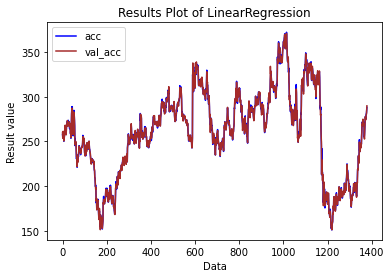

In [139]:
# Plotting the results

r = range(len(y_pred_LR))

plt.title("Results Plot of LinearRegression")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_LR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend();

In [140]:
# Training our dataset using GradientBoostingRegressor as model

model_GBR = Pipeline([('scaler', StandardScaler()), ('model_GBR', GradientBoostingRegressor(random_state=0))])

model_GBR.fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_GBR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_GBR.score(x_test, y_test))

pickle.dump(model_GBR, open('C:\\Users\\amolk\\Downloads\\stockClosingPricePrediction-app-main\\models\\model_GBR.pkl', 'wb'))



Score on training data:
0.99892


Score on testing data:
0.99221


In [141]:
y_pred_GBR = model_GBR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_GBR)):
    expl=((actual_data[i]-y_pred_GBR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_GBR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $257.80, Predicted value $257.72 (%0.03)
Actual Value $254.95, Predicted value $254.39 (%0.22)
Actual Value $257.60, Predicted value $256.10 (%0.58)
Actual Value $260.60, Predicted value $259.82 (%0.30)
Actual Value $254.00, Predicted value $257.36 (%-1.32)
Actual Value $253.95, Predicted value $255.51 (%-0.61)
Actual Value $250.25, Predicted value $252.15 (%-0.76)
Actual Value $254.60, Predicted value $252.05 (%1.00)
Actual Value $255.10, Predicted value $256.00 (%-0.35)
Actual Value $258.10, Predicted value $257.62 (%0.18)
Actual Value $260.15, Predicted value $259.71 (%0.17)
Actual Value $266.00, Predicted value $262.91 (%1.16)
Actual Value $267.75, Predicted value $267.85 (%-0.04)
Actual Value $262.35, Predicted value $262.91 (%-0.21)
Actual Value $264.80, Predicted value $262.31 (%0.94)
Actual Value $265.20, Predicted value $263.01 (%0.83)
Actual Value $259.65, Predicted value $257.81 (%0.71)
Actual Value $262.75,

In [142]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_GBR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_GBR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_GBR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_GBR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_GBR), 2))


Evaluation according to different parameters:

Mean absolute error = 2.59
Mean squared error = 17.26
Median absolute error = 1.81
Explain variance score = 0.99
R2 score = 0.99


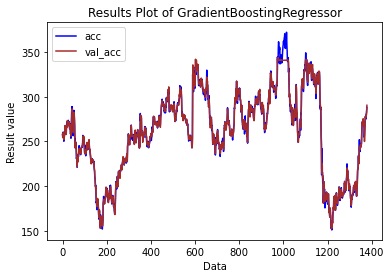

In [143]:
# Plotting the results

r = range(len(y_pred_GBR))

plt.title("Results Plot of GradientBoostingRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_GBR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [144]:
# Training our dataset using RandomForestRegressor as model

model_RFR = Pipeline([('scaler', StandardScaler()), ('model_RFR', RandomForestRegressor(random_state=0))])
model_RFR.fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_RFR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_RFR.score(x_test, y_test))

pickle.dump(model_RFR, open('C:\\Users\\amolk\\Downloads\\stockClosingPricePrediction-app-main\\models\\model_RFR.pkl', 'wb'))



Score on training data:
0.99980


Score on testing data:
0.99141


In [145]:
y_pred_RFR = model_RFR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_RFR)):
    expl=((actual_data[i]-y_pred_RFR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_RFR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $257.80, Predicted value $259.37 (%-0.61)
Actual Value $254.95, Predicted value $256.34 (%-0.55)
Actual Value $257.60, Predicted value $257.98 (%-0.15)
Actual Value $260.60, Predicted value $261.46 (%-0.33)
Actual Value $254.00, Predicted value $256.00 (%-0.79)
Actual Value $253.95, Predicted value $254.59 (%-0.25)
Actual Value $250.25, Predicted value $251.20 (%-0.38)
Actual Value $254.60, Predicted value $251.90 (%1.06)
Actual Value $255.10, Predicted value $257.43 (%-0.91)
Actual Value $258.10, Predicted value $259.54 (%-0.56)
Actual Value $260.15, Predicted value $261.11 (%-0.37)
Actual Value $266.00, Predicted value $265.87 (%0.05)
Actual Value $267.75, Predicted value $269.97 (%-0.83)
Actual Value $262.35, Predicted value $263.91 (%-0.60)
Actual Value $264.80, Predicted value $264.44 (%0.14)
Actual Value $265.20, Predicted value $265.04 (%0.06)
Actual Value $259.65, Predicted value $260.26 (%-0.24)
Actual Value $

In [146]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_RFR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_RFR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_RFR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_RFR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_RFR), 2))


Evaluation according to different parameters:

Mean absolute error = 2.74
Mean squared error = 19.05
Median absolute error = 2.02
Explain variance score = 0.99
R2 score = 0.99


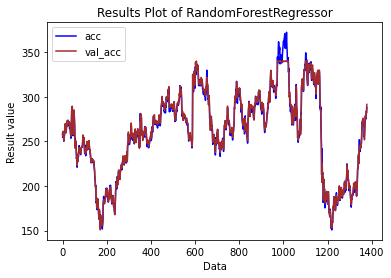

In [147]:
# Plotting the results

r = range(len(y_pred_RFR))

plt.title("Results Plot of RandomForestRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_RFR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [148]:
# Training our dataset using SupportVectorRegressor as model

model_SVR = Pipeline([('scaler', StandardScaler()), ('model_SVR', SVR())])
model_SVR.fit(x_train, y_train)
# model_SVR = SVR().fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_SVR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_SVR.score(x_test, y_test))

pickle.dump(model_SVR, open('C:\\Users\\amolk\\Downloads\\stockClosingPricePrediction-app-main\\models\\model_SVR.pkl', 'wb'))




Score on training data:
0.96645


Score on testing data:
0.51185


In [149]:
y_pred_SVR = model_SVR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_SVR)):
    expl=((actual_data[i]-y_pred_SVR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_SVR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $257.80, Predicted value $258.45 (%-0.25)
Actual Value $254.95, Predicted value $257.32 (%-0.93)
Actual Value $257.60, Predicted value $256.04 (%0.61)
Actual Value $260.60, Predicted value $259.04 (%0.60)
Actual Value $254.00, Predicted value $259.97 (%-2.35)
Actual Value $253.95, Predicted value $252.68 (%0.50)
Actual Value $250.25, Predicted value $252.87 (%-1.05)
Actual Value $254.60, Predicted value $249.59 (%1.97)
Actual Value $255.10, Predicted value $254.39 (%0.28)
Actual Value $258.10, Predicted value $256.72 (%0.54)
Actual Value $260.15, Predicted value $260.18 (%-0.01)
Actual Value $266.00, Predicted value $262.07 (%1.48)
Actual Value $267.75, Predicted value $270.37 (%-0.98)
Actual Value $262.35, Predicted value $262.55 (%-0.08)
Actual Value $264.80, Predicted value $262.97 (%0.69)
Actual Value $265.20, Predicted value $264.75 (%0.17)
Actual Value $259.65, Predicted value $258.56 (%0.42)
Actual Value $262.75

In [150]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_SVR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_SVR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_SVR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_SVR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_SVR), 2))


Evaluation according to different parameters:

Mean absolute error = 18.23
Mean squared error = 1081.89
Median absolute error = 5.64
Explain variance score = 0.6
R2 score = 0.51


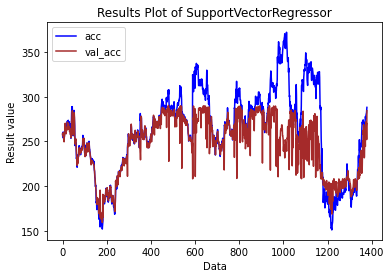

In [151]:
# Plotting the results

r = range(len(y_pred_SVR))

plt.title("Results Plot of SupportVectorRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_SVR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [152]:
# Training our dataset using KernalRidgeRegressor as model

model_KRR = KernelRidge(alpha=1.0).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_KRR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_KRR.score(x_test, y_test))

pickle.dump(model_KRR, open('C:\\Users\\amolk\\Downloads\\stockClosingPricePrediction-app-main\\models\\model_KRR.pkl', 'wb'))

C:\Users\amolk\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "




Score on training data:
0.99905


Score on testing data:
0.99815


In [153]:
y_pred_KRR = model_KRR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_KRR)):
    expl=((actual_data[i]-y_pred_KRR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_KRR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $257.80, Predicted value $259.98 (%-0.85)
Actual Value $254.95, Predicted value $253.75 (%0.47)
Actual Value $257.60, Predicted value $256.83 (%0.30)
Actual Value $260.60, Predicted value $261.41 (%-0.31)
Actual Value $254.00, Predicted value $255.23 (%-0.48)
Actual Value $253.95, Predicted value $253.32 (%0.25)
Actual Value $250.25, Predicted value $250.55 (%-0.12)
Actual Value $254.60, Predicted value $253.78 (%0.32)
Actual Value $255.10, Predicted value $254.60 (%0.20)
Actual Value $258.10, Predicted value $258.89 (%-0.31)
Actual Value $260.15, Predicted value $261.06 (%-0.35)
Actual Value $266.00, Predicted value $266.17 (%-0.06)
Actual Value $267.75, Predicted value $268.27 (%-0.20)
Actual Value $262.35, Predicted value $262.08 (%0.10)
Actual Value $264.80, Predicted value $263.40 (%0.53)
Actual Value $265.20, Predicted value $263.92 (%0.48)
Actual Value $259.65, Predicted value $257.39 (%0.87)
Actual Value $262.7

Actual Value $252.00, Predicted value $249.78 (%0.88)
Actual Value $239.75, Predicted value $244.22 (%-1.87)
Actual Value $242.75, Predicted value $238.94 (%1.57)
Actual Value $238.70, Predicted value $241.48 (%-1.16)
Actual Value $243.85, Predicted value $243.39 (%0.19)
Actual Value $243.00, Predicted value $246.19 (%-1.31)
Actual Value $245.45, Predicted value $242.82 (%1.07)
Actual Value $244.25, Predicted value $243.34 (%0.37)
Actual Value $248.05, Predicted value $247.65 (%0.16)
Actual Value $246.95, Predicted value $247.07 (%-0.05)
Actual Value $256.30, Predicted value $256.51 (%-0.08)
Actual Value $263.50, Predicted value $260.52 (%1.13)
Actual Value $269.60, Predicted value $269.61 (%-0.00)
Actual Value $271.90, Predicted value $268.78 (%1.15)
Actual Value $270.35, Predicted value $272.11 (%-0.65)
Actual Value $269.55, Predicted value $267.88 (%0.62)
Actual Value $272.45, Predicted value $275.23 (%-1.02)
Actual Value $274.20, Predicted value $274.34 (%-0.05)
Actual Value $270.6

In [154]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_KRR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_KRR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_KRR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_KRR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_KRR), 2))


Evaluation according to different parameters:

Mean absolute error = 1.4
Mean squared error = 4.09
Median absolute error = 1.01
Explain variance score = 1.0
R2 score = 1.0


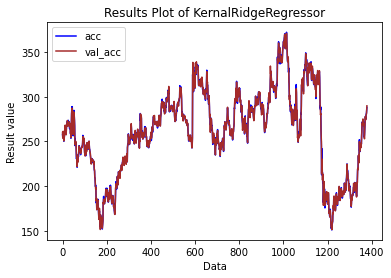

In [155]:
# Plotting the results

r = range(len(y_pred_KRR))

plt.title("Results Plot of KernalRidgeRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_KRR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [156]:
# Training our dataset using BayesianRidgeRegressor as model

model_BRR = BayesianRidge().fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_BRR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_BRR.score(x_test, y_test))

pickle.dump(model_BRR, open('C:\\Users\\amolk\\Downloads\\stockClosingPricePrediction-app-main\\models\\model_BRR.pkl', 'wb'))




Score on training data:
0.99905


Score on testing data:
0.99817


In [157]:
y_pred_BRR = model_BRR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_BRR)):
    expl=((actual_data[i]-y_pred_BRR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_BRR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $257.80, Predicted value $259.93 (%-0.83)
Actual Value $254.95, Predicted value $253.68 (%0.50)
Actual Value $257.60, Predicted value $256.77 (%0.32)
Actual Value $260.60, Predicted value $261.38 (%-0.30)
Actual Value $254.00, Predicted value $255.14 (%-0.45)
Actual Value $253.95, Predicted value $253.29 (%0.26)
Actual Value $250.25, Predicted value $250.49 (%-0.10)
Actual Value $254.60, Predicted value $253.74 (%0.34)
Actual Value $255.10, Predicted value $254.57 (%0.21)
Actual Value $258.10, Predicted value $258.86 (%-0.29)
Actual Value $260.15, Predicted value $261.01 (%-0.33)
Actual Value $266.00, Predicted value $266.12 (%-0.05)
Actual Value $267.75, Predicted value $268.21 (%-0.17)
Actual Value $262.35, Predicted value $262.05 (%0.11)
Actual Value $264.80, Predicted value $263.33 (%0.55)
Actual Value $265.20, Predicted value $263.86 (%0.51)
Actual Value $259.65, Predicted value $257.33 (%0.89)
Actual Value $262.7

In [158]:
y_pred_BRR

array([259.92688499, 253.67531437, 256.77309936, ..., 280.67205353,
       286.64970608, 289.94125605])

In [159]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_BRR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_BRR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_BRR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_BRR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_BRR), 2))


Evaluation according to different parameters:

Mean absolute error = 1.39
Mean squared error = 4.05
Median absolute error = 1.01
Explain variance score = 1.0
R2 score = 1.0


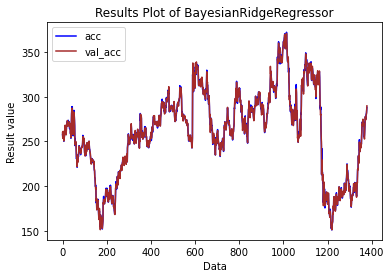

In [160]:
# Plotting the results

r = range(len(y_pred_KRR))

plt.title("Results Plot of BayesianRidgeRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_BRR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend();

In [161]:
# Training our dataset using LassoRegressor as model

model_LSS = Lasso(alpha = 1).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_LSS.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_LSS.score(x_test, y_test))

pickle.dump(model_LSS, open('C:\\Users\\amolk\\Downloads\\stockClosingPricePrediction-app-main\\models\\model_LSS.pkl', 'wb'))



Score on training data:
0.99893


Score on testing data:
0.99790


C:\Users\amolk\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6935.137516803162, tolerance: 640.8191178953023
  model = cd_fast.enet_coordinate_descent(


In [162]:
y_pred_LSS = model_LSS.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_LSS)):
    expl=((actual_data[i]-y_pred_LSS[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_LSS[i], expl))



Difference between Actual value and Predicted value:
Actual Value $257.80, Predicted value $259.45 (%-0.64)
Actual Value $254.95, Predicted value $254.33 (%0.24)
Actual Value $257.60, Predicted value $256.45 (%0.45)
Actual Value $260.60, Predicted value $260.96 (%-0.14)
Actual Value $254.00, Predicted value $256.11 (%-0.83)
Actual Value $253.95, Predicted value $253.31 (%0.25)
Actual Value $250.25, Predicted value $251.07 (%-0.33)
Actual Value $254.60, Predicted value $253.19 (%0.56)
Actual Value $255.10, Predicted value $254.69 (%0.16)
Actual Value $258.10, Predicted value $258.44 (%-0.13)
Actual Value $260.15, Predicted value $260.78 (%-0.24)
Actual Value $266.00, Predicted value $265.31 (%0.26)
Actual Value $267.75, Predicted value $268.30 (%-0.21)
Actual Value $262.35, Predicted value $262.78 (%-0.16)
Actual Value $264.80, Predicted value $262.98 (%0.69)
Actual Value $265.20, Predicted value $263.82 (%0.52)
Actual Value $259.65, Predicted value $257.46 (%0.84)
Actual Value $262.7

In [163]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_LSS), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_LSS), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_LSS), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_LSS), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_LSS), 2))


Evaluation according to different parameters:

Mean absolute error = 1.58
Mean squared error = 4.64
Median absolute error = 1.25
Explain variance score = 1.0
R2 score = 1.0


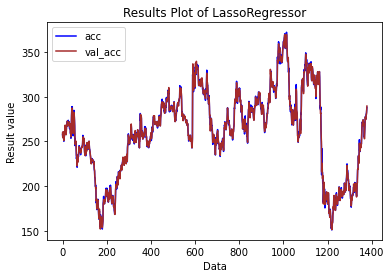

In [164]:
# Plotting the results

r = range(len(y_pred_LSS))

plt.title("Results Plot of LassoRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_LSS, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [165]:
# Training our dataset using DecisionTreeRegressor as model

model_DTR = DecisionTreeRegressor(random_state = 10).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_DTR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_DTR.score(x_test, y_test))

pickle.dump(model_DTR, open('C:\\Users\\amolk\\Downloads\\stockClosingPricePrediction-app-main\\models\\model_DTR.pkl', 'wb'))




Score on training data:
1.00000


Score on testing data:
0.98380


In [166]:
y_pred_DTR = model_DTR.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_DTR)):
    expl=((actual_data[i]-y_pred_DTR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_DTR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $257.80, Predicted value $259.78 (%-0.77)
Actual Value $254.95, Predicted value $258.23 (%-1.28)
Actual Value $257.60, Predicted value $260.15 (%-0.99)
Actual Value $260.60, Predicted value $259.78 (%0.31)
Actual Value $254.00, Predicted value $256.95 (%-1.16)
Actual Value $253.95, Predicted value $254.04 (%-0.03)
Actual Value $250.25, Predicted value $252.47 (%-0.89)
Actual Value $254.60, Predicted value $252.47 (%0.84)
Actual Value $255.10, Predicted value $260.23 (%-2.01)
Actual Value $258.10, Predicted value $260.23 (%-0.82)
Actual Value $260.15, Predicted value $259.78 (%0.14)
Actual Value $266.00, Predicted value $266.32 (%-0.12)
Actual Value $267.75, Predicted value $272.50 (%-1.77)
Actual Value $262.35, Predicted value $265.67 (%-1.27)
Actual Value $264.80, Predicted value $263.60 (%0.45)
Actual Value $265.20, Predicted value $266.32 (%-0.42)
Actual Value $259.65, Predicted value $262.04 (%-0.92)
Actual Value $

Actual Value $260.35, Predicted value $263.04 (%-1.03)
Actual Value $270.70, Predicted value $269.82 (%0.33)
Actual Value $273.30, Predicted value $273.68 (%-0.14)
Actual Value $277.55, Predicted value $278.79 (%-0.44)
Actual Value $277.05, Predicted value $277.65 (%-0.22)
Actual Value $277.90, Predicted value $277.15 (%0.27)
Actual Value $277.20, Predicted value $280.85 (%-1.32)
Actual Value $275.85, Predicted value $271.93 (%1.42)
Actual Value $276.35, Predicted value $280.75 (%-1.59)
Actual Value $271.65, Predicted value $271.93 (%-0.10)
Actual Value $270.20, Predicted value $271.90 (%-0.63)
Actual Value $268.95, Predicted value $272.50 (%-1.32)
Actual Value $270.50, Predicted value $271.93 (%-0.53)
Actual Value $269.35, Predicted value $271.90 (%-0.95)
Actual Value $269.65, Predicted value $271.90 (%-0.83)
Actual Value $270.70, Predicted value $271.90 (%-0.44)
Actual Value $272.30, Predicted value $273.68 (%-0.51)
Actual Value $270.45, Predicted value $271.90 (%-0.54)
Actual Value 

In [167]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_DTR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_DTR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_DTR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_DTR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_DTR), 2))


Evaluation according to different parameters:

Mean absolute error = 3.71
Mean squared error = 35.9
Median absolute error = 2.39
Explain variance score = 0.98
R2 score = 0.98


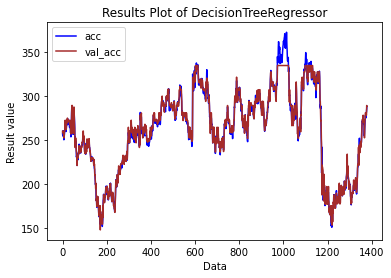

In [168]:
# Plotting the results

r = range(len(y_pred_DTR))

plt.title("Results Plot of DecisionTreeRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_DTR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [169]:
# Training our dataset using MultiLayeredPerceptronRegressor as model

model_MLP = MLPRegressor(random_state=0, max_iter=100).fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_MLP.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_MLP.score(x_test, y_test))

pickle.dump(model_MLP, open('C:\\Users\\amolk\\Downloads\\stockClosingPricePrediction-app-main\\models\\model_MLP.pkl', 'wb'))



Score on training data:
-3.46701


Score on testing data:
-22.59815


In [170]:
y_pred_MLP = model_MLP.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_MLP)):
    expl=((actual_data[i]-y_pred_MLP[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_MLP[i], expl))



Difference between Actual value and Predicted value:
Actual Value $257.80, Predicted value $155.40 (%39.72)
Actual Value $254.95, Predicted value $189.39 (%25.72)
Actual Value $257.60, Predicted value $170.97 (%33.63)
Actual Value $260.60, Predicted value $132.11 (%49.30)
Actual Value $254.00, Predicted value $220.38 (%13.23)
Actual Value $253.95, Predicted value $135.96 (%46.46)
Actual Value $250.25, Predicted value $154.36 (%38.32)
Actual Value $254.60, Predicted value $123.09 (%51.65)
Actual Value $255.10, Predicted value $134.21 (%47.39)
Actual Value $258.10, Predicted value $138.17 (%46.47)
Actual Value $260.15, Predicted value $143.76 (%44.74)
Actual Value $266.00, Predicted value $134.81 (%49.32)
Actual Value $267.75, Predicted value $180.05 (%32.75)
Actual Value $262.35, Predicted value $109.82 (%58.14)
Actual Value $264.80, Predicted value $183.47 (%30.71)
Actual Value $265.20, Predicted value $166.05 (%37.39)
Actual Value $259.65, Predicted value $169.44 (%34.74)
Actual Val

In [171]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_MLP), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_MLP), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_MLP), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_MLP), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_MLP), 2))


Evaluation according to different parameters:

Mean absolute error = 150.28
Mean squared error = 52301.16
Median absolute error = 108.97
Explain variance score = -22.24
R2 score = -22.6


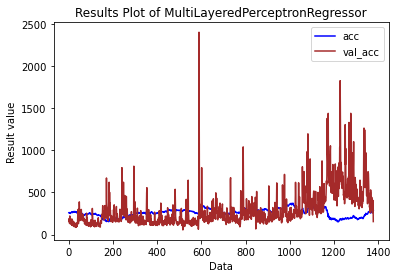

In [172]:
# Plotting the results

r = range(len(y_pred_DTR))

plt.title("Results Plot of MultiLayeredPerceptronRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_MLP, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [173]:
# Training our dataset using VotingRegressor as model

model_VR = VotingRegressor(estimators=[('ml', model_LR), ('msv', model_SVR)])
model_VR.fit(x_train, y_train)

print("\n\nScore on training data:")
print("========================================")
print("%.5f" %model_VR.score(x_train, y_train))

print("\n\nScore on testing data:")
print("========================================")
print("%.5f" %model_VR.score(x_test, y_test))

pickle.dump(model_VR, open('C:\\Users\\amolk\\Downloads\\stockClosingPricePrediction-app-main\\models\\model_VR.pkl', 'wb'))



Score on training data:
0.99094


Score on testing data:
0.87716


In [174]:
y_pred_VR = model_MLP.predict(x_test)
actual_data = np.array(y_test)

print("\n\nDifference between Actual value and Predicted value:")
print("========================================")

for i in range(len(y_pred_VR)):
    expl=((actual_data[i]-y_pred_VR[i])/actual_data[i])*100.0
    print('Actual Value ${:,.2f}, Predicted value ${:,.2f} (%{:,.2f})'.format(actual_data[i], y_pred_VR[i], expl))



Difference between Actual value and Predicted value:
Actual Value $257.80, Predicted value $155.40 (%39.72)
Actual Value $254.95, Predicted value $189.39 (%25.72)
Actual Value $257.60, Predicted value $170.97 (%33.63)
Actual Value $260.60, Predicted value $132.11 (%49.30)
Actual Value $254.00, Predicted value $220.38 (%13.23)
Actual Value $253.95, Predicted value $135.96 (%46.46)
Actual Value $250.25, Predicted value $154.36 (%38.32)
Actual Value $254.60, Predicted value $123.09 (%51.65)
Actual Value $255.10, Predicted value $134.21 (%47.39)
Actual Value $258.10, Predicted value $138.17 (%46.47)
Actual Value $260.15, Predicted value $143.76 (%44.74)
Actual Value $266.00, Predicted value $134.81 (%49.32)
Actual Value $267.75, Predicted value $180.05 (%32.75)
Actual Value $262.35, Predicted value $109.82 (%58.14)
Actual Value $264.80, Predicted value $183.47 (%30.71)
Actual Value $265.20, Predicted value $166.05 (%37.39)
Actual Value $259.65, Predicted value $169.44 (%34.74)
Actual Val

In [175]:
print("\nEvaluation according to different parameters:")
print("========================================")

print("\nMean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_VR), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_VR), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_VR), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_VR), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_VR), 2))


Evaluation according to different parameters:

Mean absolute error = 150.28
Mean squared error = 52301.16
Median absolute error = 108.97
Explain variance score = -22.24
R2 score = -22.6


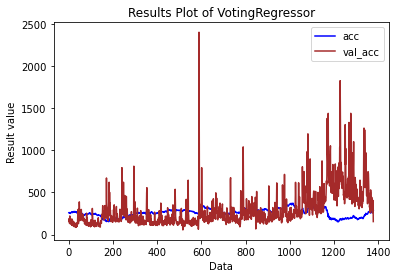

In [176]:
# Plotting the results

r = range(len(y_pred_DTR))

plt.title("Results Plot of VotingRegressor")
plt.plot(r, y_test, color='blue', label='acc')
plt.plot(r, y_pred_VR, color='brown', label='val_acc')
plt.xlabel("Data")
plt.ylabel("Result value")
plt.legend()

In [177]:
# Created a new dataframe with only the closing column
data = ds.filter(['Adj Close'])
#Getting the values from data and converting it to a numpy array
dataset= data.values
#Getting the number of rows to train the model 
training_data_len=math.ceil(len(dataset)*.9)
training_data_len

3103

In [178]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02425962],
       [0.02506587],
       [0.02350705],
       ...,
       [0.74070868],
       [0.75014782],
       [0.75915802]])

In [179]:
#creating the testing data set by making a new array that contian the scaled values from the index 1069
test_data = scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:, :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [184]:
#Covert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[[0.91047087],
        [0.91361728],
        [0.95123095],
        ...,
        [0.74528527],
        [0.76359153],
        [0.76688093]],

       [[0.91361728],
        [0.95123095],
        [0.96939424],
        ...,
        [0.76359153],
        [0.76688093],
        [0.75529652]],

       [[0.95123095],
        [0.96939424],
        [0.96467458],
        ...,
        [0.76688093],
        [0.75529652],
        [0.74628641]],

       ...,

       [[0.48256149],
        [0.50201192],
        [0.50315605],
        ...,
        [0.72125829],
        [0.73398683],
        [0.7387064 ]],

       [[0.50201192],
        [0.50315605],
        [0.49457498],
        ...,
        [0.73398683],
        [0.7387064 ],
        [0.74070868]],

       [[0.50315605],
        [0.49457498],
        [0.50701755],
        ...,
        [0.7387064 ],
        [0.74070868],
        [0.75014782]]])

In [200]:
np.size(arr, axis=None)

180

In [202]:
print('Total Number of elements in 3D Numpy array : ', np.size(x_test))

Total Number of elements in 3D Numpy array :  20640


In [203]:
print('Axis 0 size : ', np.size(x_test, 0))
print('Axis 1 size : ', np.size(x_test, 1))
print('Axis 2 size : ', np.size(x_test, 2))

Axis 0 size :  344
Axis 1 size :  60
Axis 2 size :  1


In [193]:
#Reshaping the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[0.91047087],
        [0.91361728],
        [0.95123095],
        ...,
        [0.74528527],
        [0.76359153],
        [0.76688093]],

       [[0.91361728],
        [0.95123095],
        [0.96939424],
        ...,
        [0.76359153],
        [0.76688093],
        [0.75529652]],

       [[0.95123095],
        [0.96939424],
        [0.96467458],
        ...,
        [0.76688093],
        [0.75529652],
        [0.74628641]],

       ...,

       [[0.48256149],
        [0.50201192],
        [0.50315605],
        ...,
        [0.72125829],
        [0.73398683],
        [0.7387064 ]],

       [[0.50201192],
        [0.50315605],
        [0.49457498],
        ...,
        [0.73398683],
        [0.7387064 ],
        [0.74070868]],

       [[0.50315605],
        [0.49457498],
        [0.50701755],
        ...,
        [0.7387064 ],
        [0.74070868],
        [0.75014782]]])

In [ ]:
#Reshaping the data
#x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#x_test

In [187]:
#Get the model predicted price values 
predictions = model_BRR.predict(x_test)
predictions = scaler.inverse_transform(predictions)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
#Get the root mean squared error RMSE
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:].copy()
valid['Predictions'] = predictions 
#Visulatziation of the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc="lower right")
plt.show();

In [ ]:
#show the valid and the predicted prices 
valid.tail()

In [ ]:
#Lets predict the price for jan
veru_qutoes= web.DataReader('^GDAXI',data_source='yahoo',start='2016-01-01', end='2021-01-07')
# New df
new_df = veru_qutoes.filter(['Adj Close'])
#Getting the last 60 days closing price
last_60_days = new_df[-60:].values
#Scale the data
last_60_days_scaled=scaler.transform(last_60_days)
#empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convering to numpay, and 3d for the LSTM
X_test= np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_prices= model.predict(X_test)
#undo the scaling
pred_prices = scaler.inverse_transform(pred_prices)
print(pred_prices)

In [ ]:
veru_qutoes2= web.DataReader('^GDAXI',data_source='yahoo',start='2016-01-01', end='2021-01-08')

print(veru_qutoes2['Adj Close'])